In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
from joblib import dump, load

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Local data models

In [2]:
path = '../../p2/collection'
col_names = ["website-index", "time", "direction", "packet size"]
folders = []
for r, d, f in os.walk(path):
    for folder in d:
        folders.append(folder)

results = {}

# Loop over the folders in /collection
for folder in folders:
    if (folder == "raw"):
        continue 
    results[folder] = {} # Goddam python dictionaries

    # Load data into dataframes
    df_one = pd.read_csv(path+"/"+folder+"/"+"Day1-parsed-ondevice.csv", header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False, quotechar='^')
    df_two = pd.read_csv(path+"/"+folder+"/"+"Day2-parsed-ondevice.csv", header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False, quotechar='^')
    df_three = pd.read_csv(path+"/"+folder+"/"+"Day3-parsed-ondevice.csv", header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False, quotechar='^')
    
    # Preprocess training data
    df = df_one.append(df_two)
    X = df.loc[:, df.columns != 'website-index']
    y = df['website-index']
    
    # Preprocess testing data
    X_test = df_three.loc[:, df_three.columns != 'website-index']
    y_test = df_three['website-index']
    
    outpath = './models/' + folder + "/"
    if not os.path.exists(outpath):
        os.mkdir(outpath)    

    # RF model training
    clf = RandomForestClassifier(n_jobs=-1)
    clf.fit(X,y)
    rf_acc = clf.score(X_test, y_test)
    print("RF acc: " + str(rf_acc))
    results[folder]["rf"] = str(rf_acc)
    dump(clf, outpath + 'rf_model.joblib')
    print(results)

    # SVM model training
    svm_model = svm.SVC(verbose=True, cache_size=8000) # Yes i have the ram
    svm_model.fit(X, y)
    svm_acc = svm_model.score(X_test, y_test)
    print("SVM acc: " + str(svm_acc))
    results[folder]["svm"] = str(svm_acc)
    dump(svm_model, outpath + 'svm_model.joblib')
    print(results)

    # LR model training
    lr = LogisticRegression(random_state=0, max_iter=10e5, n_jobs=-1)
    lr.fit(X, y)
    lr_acc = lr.score(X_test, y_test)
    print("Logistic Reg acc: " + str(lr_acc))
    results[folder]["lr"] = str(lr_acc)
    dump(lr, outpath + "lr_model.joblib")
    print(results)

all


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.20282841849532876
{'all': {'rf': '0.20282841849532876'}}
[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM acc: 0.22171087716526103
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.1613749037113117
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}}
df_http


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.32978723404255317
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317'}}
[LibSVM]SVM acc: 0.3404255319148936
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936'}}
Logistic Reg acc: 0.21808510638297873
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}}
df_http_tcp


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Prog

RF acc: 0.15967685921711952
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952'}}
[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM acc: 0.3526352345830095
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.1419901106352015
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}}
df_http_tcp_udp


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.2037161108863077
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.3820788197599984
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.17080046965485676
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}}
df_http_tls


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.3097651891070538
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538'}}
[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM acc: 0.3443101688074266
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.1738170421899855
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}}
df_http_tls_tcp


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.18547421547378568
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.1963357053828537
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.16377579527104605
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}}
df_http_tls_tcp_udp


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.20156217562798423
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.22305376790533527
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.1523354785135977
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}}
df_http_tls_udp


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.29559293757820104
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104'}}
[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM acc: 0.34468233004309745
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.18623661893507576
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}}
df_http_udp


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.31467715590519685
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685'}}
[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM acc: 0.37464582152738424
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424'}}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.42851428380946033
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}}
df_tcp


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.157879917184265
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.15787991718

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.3526128364389234
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.14200414078674947
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.20305391170356202
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.157879917

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.382223816260519
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.15

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.16926029981203633
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.3133242708258806
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.1578799171

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM acc: 0.34489995468746276
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.15787991

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.17462020939161957
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.1880490038787566
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.1578799171

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.19629827699608435
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.16386056146691994
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.20558256966523283
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.157879917

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.22301186542817364
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.153668723895019
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.2972596247665245
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.1578799171

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]SVM acc: 0.34498620055197793
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.18620891527975245
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF acc: 0.3150179463956258
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.1578799171

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM acc: 0.3753647982288417
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.157879917

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Logistic Reg acc: 0.4282311898292577
{'all': {'rf': '0.20282841849532876', 'svm': '0.22171087716526103', 'lr': '0.1613749037113117'}, 'df_http': {'rf': '0.32978723404255317', 'svm': '0.3404255319148936', 'lr': '0.21808510638297873'}, 'df_http_tcp': {'rf': '0.15967685921711952', 'svm': '0.3526352345830095', 'lr': '0.1419901106352015'}, 'df_http_tcp_udp': {'rf': '0.2037161108863077', 'svm': '0.3820788197599984', 'lr': '0.17080046965485676'}, 'df_http_tls': {'rf': '0.3097651891070538', 'svm': '0.3443101688074266', 'lr': '0.1738170421899855'}, 'df_http_tls_tcp': {'rf': '0.18547421547378568', 'svm': '0.1963357053828537', 'lr': '0.16377579527104605'}, 'df_http_tls_tcp_udp': {'rf': '0.20156217562798423', 'svm': '0.22305376790533527', 'lr': '0.1523354785135977'}, 'df_http_tls_udp': {'rf': '0.29559293757820104', 'svm': '0.34468233004309745', 'lr': '0.18623661893507576'}, 'df_http_udp': {'rf': '0.31467715590519685', 'svm': '0.37464582152738424', 'lr': '0.42851428380946033'}, 'df_tcp': {'rf': '0.

#### Accuracy of the 3 models with different subset of packets types

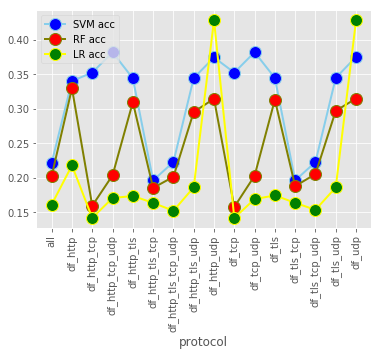

In [44]:
x_key = svm_key = list(map(lambda x : x[0], svm_results))
x_pos = [i for i, _ in enumerate(x_key)]

svm_results = [(k, r['svm']) for k,r in results.items()]
svm_val = list(map(lambda x : float(x[1]), svm_results))

rf_results = [(k, r['rf']) for k,r in results.items()]
rf_val = list(map(lambda x : float(x[1]), rf_results))

lr_results =  [(k, r['lr']) for k,r in results.items()]
lr_val = list(map(lambda x : float(x[1]), lr_results))

# multiple line plot
plt.plot(x_pos, svm_val, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2, label='SVM acc')
plt.plot(x_pos, rf_val, marker='o', markerfacecolor='red', markersize=12, color='olive', linewidth=2, label='RF acc')
plt.plot(x_pos, lr_val, marker='o', markerfacecolor='green', markersize=12, color='yellow', linewidth=2, label='LR acc')
plt.xticks(x_pos, x_key, rotation='vertical')
plt.xlabel("protocol")
plt.ylabel("Accuracy")

plt.legend()

#### Average accuracy of the 3 model types

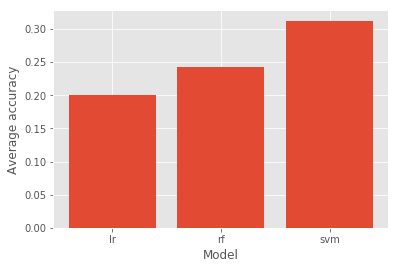

In [47]:
lr_av = np.mean(lr_val)
rf_av = np.mean(rf_val)
svm_av = np.mean(svm_val)
plt.bar([0,1,2], [lr_av, rf_av, svm_av])
plt.xticks([0,1,2], ['lr', 'rf', 'svm'])
plt.xlabel("Model")
plt.ylabel("Average accuracy")

plt.show()

As we can see from the plot above, using UDP with Logistical Regression (LR) seems to provide the best results. 

However, averaging out across protocols, LR performs the worst. 

We also want to verify the impact on accuracy depending on the protocol used. 

To do this we calculate the average accuracies for each model type (lr, rf, svm), for each model that uses http, udp, tls, tcp protocols. 

For example, we calculate the average accuracy given model type SVM that uses UDP packets (df_udp, df_http_udp, df_tcp_udp, ..., etc.)

#### Average accuracy of the 3 models across different subset of packets

In [87]:
# For HTTP, TCP, UDP, TLS, plot their average accuracy on each of the 3 models
# x-axis: protcols that uses http, tcp, udp, or tls
# y-axis average accuracy on for models that used that protocol
http = [d for d in x_key if d.find("http") >= 0]
udp = [d for d in x_key if d.find("udp") >= 0]
tls = [d for d in x_key if d.find("tls") >= 0]
tcp = [d for d in x_key if d.find("tcp") >= 0]

# print(http)
# print(udp)
# print(tls)
# print(tcp)

http_svm_val = [r['svm'] for k,r in results.items() if k in http]
udp_svm_val = [r['svm'] for k,r in results.items() if k in udp]
tls_svm_val = [r['svm'] for k,r in results.items() if k in tls]
tcp_svm_val = [r['svm'] for k,r in results.items() if k in tcp]

http_lr_val = [r['lr'] for k,r in results.items() if k in http]
udp_lr_val = [r['lr'] for k,r in results.items() if k in udp]
tls_lr_val = [r['lr'] for k,r in results.items() if k in tls]
tcp_lr_val = [r['lr'] for k,r in results.items() if k in tcp]

http_rf_val = [r['rf'] for k,r in results.items() if k in http]
udp_rf_val = [r['rf'] for k,r in results.items() if k in udp]
tls_rf_val = [r['rf'] for k,r in results.items() if k in tls]
tcp_rf_val = [r['rf'] for k,r in results.items() if k in tcp]

http_svm_av = np.mean(list(map(lambda x: float(x), http_svm_val)))
http_lr_av = np.mean(list(map(lambda x: float(x), http_lr_val)))
http_rf_av = np.mean(list(map(lambda x: float(x), http_rf_val)))

udp_svm_av = np.mean(list(map(lambda x: float(x), udp_svm_val)))
udp_lr_av = np.mean(list(map(lambda x: float(x), udp_lr_val)))
udp_rf_av = np.mean(list(map(lambda x: float(x), udp_rf_val)))

tls_svm_av = np.mean(list(map(lambda x: float(x), tls_svm_val)))
tls_lr_av = np.mean(list(map(lambda x: float(x), tls_lr_val)))
tls_rf_av = np.mean(list(map(lambda x: float(x), tls_rf_val)))

tcp_svm_av = np.mean(list(map(lambda x: float(x), tcp_svm_val)))
tcp_lr_av = np.mean(list(map(lambda x: float(x), tcp_lr_val)))
tcp_rf_av = np.mean(list(map(lambda x: float(x), tcp_rf_val)))


from IPython.display import HTML, display
import tabulate
table = [["","SVM","LR", "RF"],
         ["HTTP", http_svm_av, http_lr_av, http_rf_av],
         ["UDP", udp_svm_av, udp_lr_av, udp_rf_av],
         ["TLS", tls_svm_av, tls_lr_av, tls_rf_av],
         ["TCP",tcp_svm_av, tcp_lr_av, tcp_rf_av]
        ]

print("Average accuracy of protocol usage against model")
display(HTML(tabulate.tabulate(table, tablefmt='html', floatfmt=(".4f", ".4f", ".4f"))))

# We would also want to normalize it by the average proportion of protocol packtes in each dataset that the protocol was part of

Average accuracy of protocol usage against model


,SVM,LR,RF
HTTP,0.3197709224904999,0.2044443631740253,0.2500314847297752
UDP,0.33125592746316596,0.23440699746613203,0.2545578040660794
TLS,0.2771972837253015,0.16931541811787698,0.2495762483654274
TCP,0.2885312903443622,0.15721194750442835,0.1881243454546267


From the table above, it seems like HTTP and UDP plays a big role in SVM. 

However, findings in this table must be taken with a grain of salt as protocol usage is very skewed in the data i.e. a data collection might have 4 HTTP packets and hundreds of UDP.



## Next steps

At this point, we should verify why LR with UDP provides the best results. Our theory is that TCP data has too much noise where a lot of different services are also using TCP. Additionally, we guess that most of the UDP traffic is generated by the website. Hence manual selection of the UDP protocol data provides the best results as it minimizes the noise. 

TODO: check the distribution of UDP packets across each website 

### Community data model

#### HTTP

In [4]:
# Community data import (make sure to have path with access to parsed community data)
path="community_data/parsed_on_device/http/"
day_one="day_1"
day_two="day_2"
day_three="day_3"
file="_fixed.csv"
col_names = ["website-index", "time", "direction", "packet size"]

df_one = pd.read_csv(path+day_one+file, header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False)
df_two = pd.read_csv(path+day_two+file, header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False)
df_three = pd.read_csv(path+day_three+file, header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False)

# Preprocess training data
df = df_one.append(df_two)
X = df.loc[:, df.columns != 'website-index']
y = df['website-index']

# Preprocess testing data
X_test = df_three.loc[:, df_three.columns != 'website-index']
y_test = df_three['website-index']

# Model training
clf = RandomForestClassifier()
clf.fit(X,y)

svm_model = svm.SVC()
svm_model.fit(X, y)

# Evaluate
rf_acc = clf.score(X_test, y_test)
svm_acc = svm_model.score(X_test, y_test)

print("RF acc: " + str(rf_acc))
print("SVM acc: " + str(svm_acc))

RF acc: 0.06477577615944806
SVM acc: 0.05672671521655807


#### TLS

In [6]:
path="community_data/parsed_on_device/tls/"
day_one="day_1"
day_two="day_2"
day_three="day_3"
file="_fixed.csv"
col_names = ["website-index", "time", "direction", "packet size"]

df_one = pd.read_csv(path+day_one+file, header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False)
df_two = pd.read_csv(path+day_two+file, header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False)
df_three = pd.read_csv(path+day_three+file, header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False)

# Preprocess training data
df = df_one.append(df_two)
X = df.loc[:, df.columns != 'website-index']
y = df['website-index']

# Preprocess testing data
X_test = df_three.loc[:, df_three.columns != 'website-index']
y_test = df_three['website-index']

# Model training
clf = RandomForestClassifier()
clf.fit(X,y)

# Evaluate
rf_acc = clf.score(X_test, y_test)

print("RF acc: " + str(rf_acc))

### Feature Engineering

Here we are going to add features from the papers & re-train/test the models to see their effect

In [95]:
path = "collection/"
folder = "df_http_udp/" # specify which packet protocol config you want here

df_one = pd.read_csv(path+folder+"Day1-parsed-ondevice.csv", header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False, quotechar='^')
df_two = pd.read_csv(path+folder+"Day2-parsed-ondevice.csv", header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False, quotechar='^')
df_three = pd.read_csv(path+folder+"Day3-parsed-ondevice.csv", header=0, names=col_names, error_bad_lines=False, warn_bad_lines=False, quotechar='^')

#### fingerprinting-ndss2016; cumulative representation of trace

In [96]:
def directional_packet_size(x):
    if (x['direction'] == 1):
        return -x['packet size']
    else:
        return x['packet size']

In [97]:
def cum_trace(df):    
    # Create a directional packet size column p_i (negative values if outbound)
    df.insert(4, 'p_i', df['packet size'])
    df['p_i'] = df.apply(directional_packet_size, axis=1)

    # Create cumulative packet size trace using directional packet sizes
    df['c_i'] = df.groupby('website-index')['p_i'].cumsum(axis=None)

    return df

In [98]:
df_one = cum_trace(df_one)
df_two = cum_trace(df_two)
df_three = cum_trace(df_three)

In [103]:
# Preprocess training data
df = df_one.append(df_two)
X = df.loc[:, df.columns != 'website-index']
y = df['website-index']

# Preprocess testing data
X_test = df_three.loc[:, df_three.columns != 'website-index']
y_test = df_three['website-index']

# Model training
clf = RandomForestClassifier()
clf.fit(X,y)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X,y)

# Evaluate
rf_acc = clf.score(X_test, y_test)
knn_acc = knn.score(X_test, y_test)

print("RF acc: " + str(rf_acc))
print("KNN acc: " + str(knn_acc))

RF acc: 0.7770259008633621
KNN acc: 0.6978565952198407


#### Experimenting:

In [57]:
# working on youtube only, can generalize later
youtube = df_one.loc[df_one['website-index'] == 'youtube']

# Create a directional packet size column p_i (negative values if outbound)
youtube.insert(4, 'p_i', youtube['packet size'])
youtube['p_i'] = youtube.apply(directional_packet_size, axis=1)

# Create cumulative packet size trace using directional packet sizes
youtube.insert(5, 'c_i', youtube['p_i'].cumsum(axis=None))

youtube

,website-index,time,direction,packet size,p_i,c_i
0,youtube,0.00000,1,583,-583,-583
1,youtube,0.01434,0,1484,1484,901
2,youtube,0.01569,0,317,317,1218
3,youtube,0.01675,1,130,-130,1088
4,youtube,0.03022,0,646,646,1734
...,...,...,...,...,...,...
28691,quizlet,2.99395,0,100,100,380745
28692,quizlet,3.00749,0,1484,1484,382229
28693,quizlet,3.00775,0,138,138,382367
28694,quizlet,3.00890,1,130,-130,382237
